<img align="right" style="padding-left:50px;" src="figures_wk4/data_cleaning.png" width=350><br>
### User Bias in Data Cleaning
For your homework assignment this week, we will explore how our treatment of our data can impact the quality of our results.

**Dataset:**
The data is a Salary Survey from AskAManager.org. It’s US-centric-ish but does allow for a range of country inputs.

A list of the corresponding survey questions can be found [here](https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html).

 

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('survey_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28108 non-null  object 
 1   q1         28108 non-null  object 
 2   q2         28033 non-null  object 
 3   q3         28107 non-null  object 
 4   q4         7273 non-null   object 
 5   q5         28108 non-null  object 
 6   q6         20793 non-null  float64
 7   q7         28108 non-null  object 
 8   q8         213 non-null    object 
 9   q9         3048 non-null   object 
 10  q10        28108 non-null  object 
 11  q11        23074 non-null  object 
 12  q12        28030 non-null  object 
 13  q13        28108 non-null  object 
 14  q14        28108 non-null  object 
 15  q15        27885 non-null  object 
 16  q16        27937 non-null  object 
 17  q17        27931 non-null  object 
dtypes: float64(1), object(17)
memory usage: 3.9+ MB


We can see that there are a lot of missing values in the column and we will deal with the missing value below looking at different condition of different columns.

In [4]:
df.head()

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
0,4/28/2021 3:20,55-64,Government and Public Administration,Personal Assistant/Office Manager,NaN,"86,000",0.0,AUD/NZD,NaN,NaN,New Zealand,NaN,Wellington,21 - 30 years,11 - 20 years,High School,Woman,White
1,4/27/2021 14:47,25-34,Education (Higher Education),Research Data Analyst,NaN,"42,500",NaN,USD,NaN,NaN,U.S.,Indiana,indianapolis,2 - 4 years,2 - 4 years,Master's degree,Woman,Asian or Asian American
2,4/28/2021 12:08,25-34,Education (Higher Education),Social Media Manager,NaN,"69,000",NaN,USD,NaN,NaN,United States,Indiana,South Bend,11 - 20 years,8 - 10 years,College degree,Woman,White
3,4/27/2021 20:12,35-44,Computing or Tech,Product Manager,NaN,"86,000",5000.0,USD,NaN,NaN,US,Pennsylvania,Philadelphia,11 - 20 years,11 - 20 years,Master's degree,Woman,White
4,4/27/2021 15:57,35-44,Engineering or Manufacturing,Financial Administrator,"bookkeeper, office Manager, all administrative...","61,700",0.0,CAD,NaN,NaN,"$2,175.84/year is deducted for benefits",NaN,Regina,11 - 20 years,5-7 years,College degree,Woman,White


### Assignment
Your goal for this assignment is to observe how your data treatment during the cleaning process can skew or bias the dataset.

Before diving right in, stop and read through the questions associated with the dataset. As you can see, they are either free-form text entries or categorical selections. Knowing this, perform some exploratory data analysis (EDA) to investigate the "state" of the dataset.

[Add as many code cell below here as needs]


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Calculate the percentage of null values per column
null_percentage = df.isnull().mean() * 100

# Display the percentages sorted in descending order
print("Percentage of missing values per column:")
print(null_percentage.sort_values(ascending=False))

Percentage of missing values per column:
q8           99.242209
q9           89.156112
q4           74.124804
q6           26.024619
q11          17.909492
q15           0.793368
q17           0.629714
q16           0.608368
q12           0.277501
q2            0.266828
q3            0.003558
q7            0.000000
q5            0.000000
q1            0.000000
q10           0.000000
q13           0.000000
q14           0.000000
timestamp     0.000000
dtype: float64


we can see top 3 missing values are q8, q9 and q4 but all of these are optional questions from the survey. so, we just fill it with something rather than leaving it null. While from Q6 we will take a big dive into knowing the dataset.

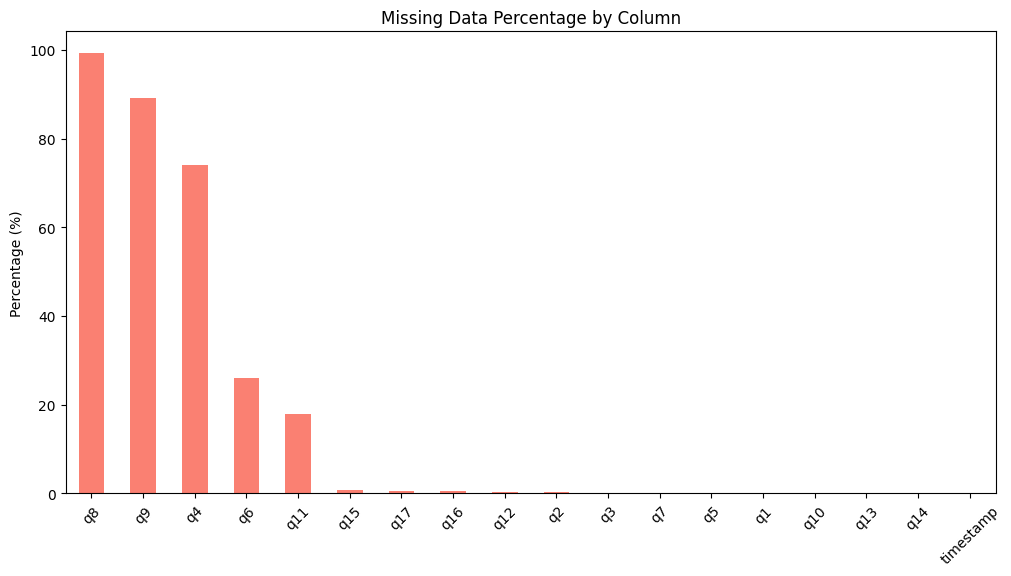

In [7]:
# Visualize Missing Data
plt.figure(figsize=(12, 6))
null_percentage.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title("Missing Data Percentage by Column")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()

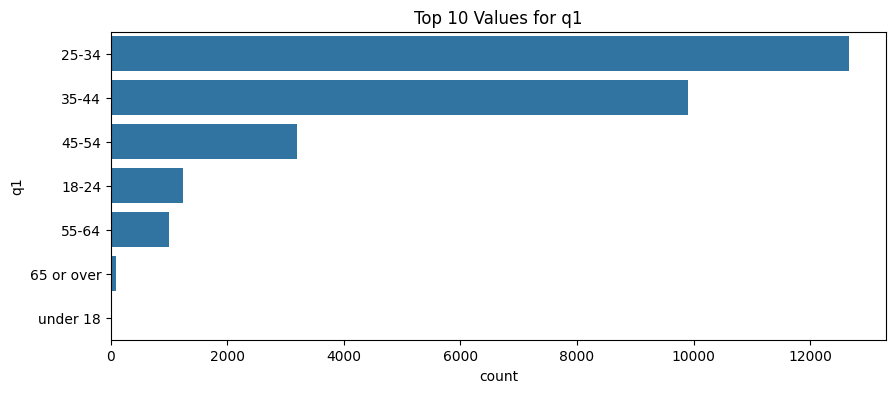

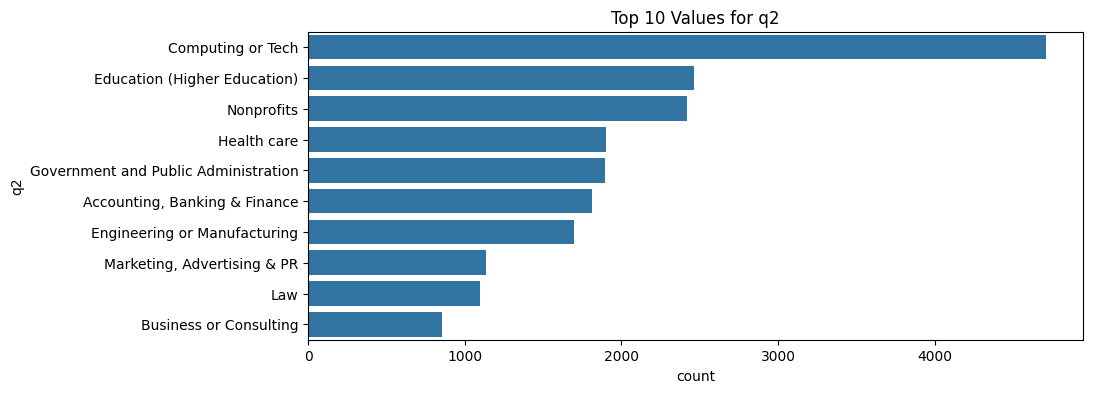

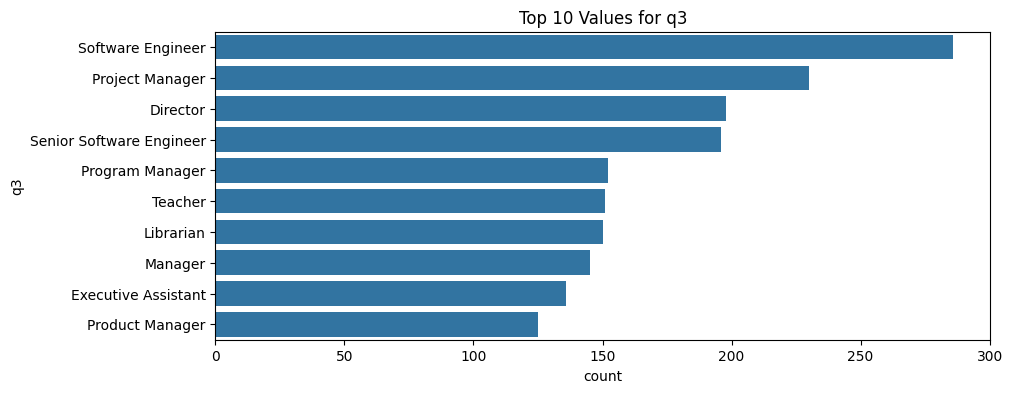

) missing from current font.g\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


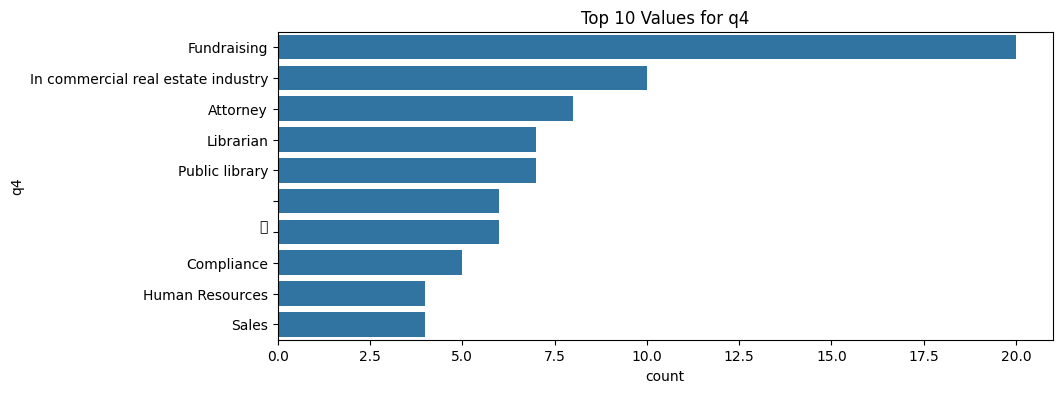

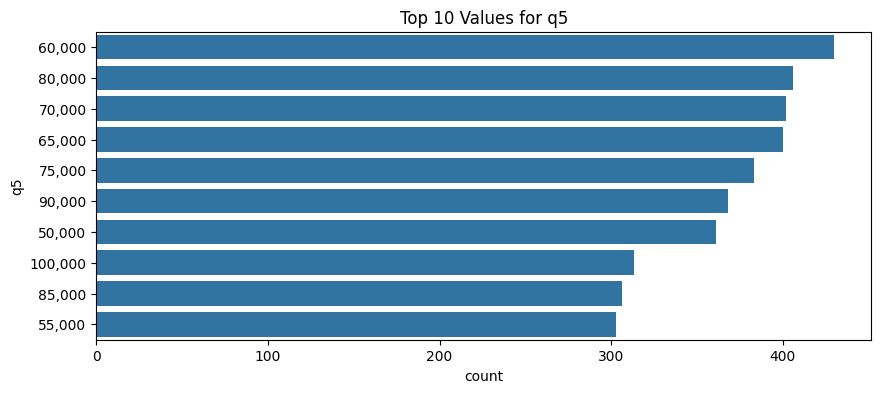

In [8]:
# Exclude the timestamp column and select other categorical columns
categorical_cols = [col for col in df.select_dtypes(include='object').columns if col != 'timestamp']

# Visualize top 10 values for the first 5 categorical columns (excluding timestamp)
for col in categorical_cols[:5]:  # Limiting to top 5 for visualization
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10])
    plt.title(f"Top 10 Values for {col}")
    plt.show()

In [9]:
# Boxplot to detect outliers
#plt.figure(figsize=(10, 5))
#sns.boxplot(x=df['q5'], color="orange")
#plt.xlabel("Salary")
#plt.title("Salary Boxplot (Outlier Detection)")
#plt.show()

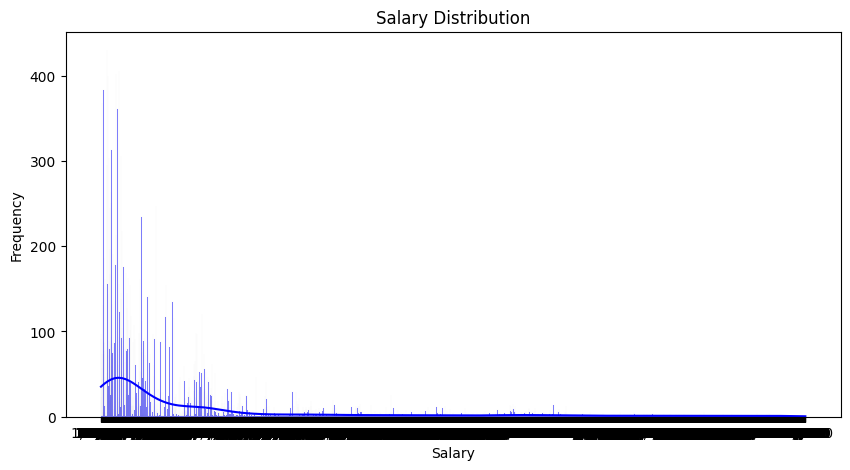

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['q5'], bins=50, kde=True, color="blue")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Salary Distribution")
plt.show()

In [11]:
# Convert Q5 to float (handling errors)
#df['q5'] = pd.to_numeric(df['q5'], errors='coerce')

In [12]:
#Define salary bins (increments of 100,000)
#bins = [0, 100000, 200000, 300000, 400000, 500000, float('inf')]
#labels = ["0-100K", "100K-200K", "200K-300K", "300K-400K", "400K-500K", "500K+"]

# Apply binning
#df['salary_category'] = pd.cut(df['q5'], bins=bins, labels=labels, right=True)


# Count per salary category
#salary_distribution = df['salary_category'].value_counts().sort_index()

# 1. Bar Plot of Salary Categories
#plt.figure(figsize=(10, 5))
#sns.barplot(x=salary_distribution.index, y=salary_distribution.values, palette="viridis")
#plt.xlabel("Salary Category")
#plt.ylabel("Number of Respondents")
#plt.title("Salary Distribution in $100K Increments")
#plt.xticks(rotation=45)
#plt.show()


**Question:** How would you describe the "state" of this dataset? Be specific and detailed in your answer. (Think paragraphs rather than sentences).

[Add you answer to this markdown cell]

The dataset offers a variety of survey responses about people's jobs, demographics, and salaries but has some important issues. Many columns have a lot of missing information, with some missing more than 70% of the data, making them less useful without careful fixes. The data is also biased, with most respondents being young (25-34 years old), working in tech, and using USD currency, which suggests the survey mostly reached a specific group. Some answers, like job titles and country names, are messy and need cleaning to be useful.</br>
A lot of cleaning need to be done on this dataset to make it ready for analysis or predection. We will try to recover every row and column rather than dropping it to get good accuracy. 

#### The Plan

Now, it is time to plan how you will clean up the dataset. You **are not** allowed to use any machine learning technique to clean the data. (No SMOTE! No machine learning! Or anything like that!)

**Question:** Based on your EDA above, detail how you would clean up this dataset. 
Things to consider: (This is not an exhaustive list)
- Are there columns that can't be effectively cleaned? If so, why?
- Are there columns that genuinely won't have a data value?
- Does it make sense to segment the dataset based on specific columns when determining how to handle the missing values?
- Are outliers a factor in this dataset?

Remember preserving as much of the data as possible is the goal. That means dropping rows with a missing value somewhere might not be the best idea.

[Add you answer to this markdown cell]

Well, I have studied the data detaily and in the part of cleaning i will perform following steps.
Q8- Q8 is just other option for USD so. IF there is any 'Other' Value in Q7 i will change its value to Q8 and remove the column Q8.</br>
Q9- This is a optional question but i will not remove it instead of leaving the column "Null" i will just change it to 'No context'.</br>
Q4- Similar operation for Q4 as Q9.</br>
Q6- So, this is just the extra income as everybody dont have one instead of leaving it null will replace with '0'.</br>
Q17- I will replace the Null value with 'Outside USA' as there is no option for States or city outside usa.</br>
Q15- This is the educational field. so, i will just replace the null value with not mentioned.</br>
Q16- There are some missing value in the column so will just replace the value with 'Other or prefer not to answer'.</br>
Q11- The name of the country is given in different format. First of all i will change all the values in Q11 which respective Q12 value are given as Q12 only has value if its USA. so, i will replace it as 'USA' and will look to unique value and decide how to deal with the countries similar name with different orientation.</br>

#### Implementation

Based on the plan the you described above, go ahead and clean up the dataset.

[Add as many code cell below here as needs]

Well, As we see Q8 is a dropdown menu so we cant change its value to anything else. So, to remove the null in q8 we can just transfer the value from q7 to q8 where q7 value is null. So, we can do further analysis. After that even if we dropped q7 there wont be any matter but lets not do that as it has foreign key associated to other tables in our consideration.

All the one liner code is written below that means if null can be just removed by a word. Expect 8 we are replacing q8 by q7 values because q7 value is a dropdown menu and q8 is a text field. Basically, we might need q8 only now but lets leave q7 also as we dont want to drop a column.

In [13]:
# Replace null values in q4 with 'No context' as the value is optional and in text format
df['q4'].fillna('No context', inplace=True)

# Replace null values in q6 with 0 as not everybody has extra source of income
df['q6'].fillna(0, inplace=True)

# Fill missing values in Q8 with corresponding values from Q7
df['q8'].fillna(df['q7'], inplace=True)

# Replace null values in q9 with 'No context' as the value is optional and in text format
df['q9'].fillna('No context', inplace=True)

# Replace null values in q16 with 'Other or prefer not to answer' 
df['q16'].fillna('Other or prefer not to answer', inplace=True)

# Replace null values in q16 with 'Other or prefer not to answer' 
df['q17'].fillna('Another option not listed here or prefer not to answer', inplace=True)



So, for q11 there is a problem as there is no option for 'Other' or anything. So, i will look from the 2 perspective over here .</br>
condition 1: we are only using the given dataset for the analysis not other associated dataset.</br>
Condition 2: we have other dataset also to look for analysis associated with this. </br>
So, i will have 2 solutions for this.</br>
First of all if we only have one dataset for analysis then we can add 'Outside USA' ourself on the place of null values. But if we have another dataset related to this one then we can make another column for ourself and transfer the values and in place of null we can just add 'Outside USA' then for the analysis purpose we can use that table which will make more sense from my perspective. If our end result is to make the dataset clean anyhow. </br>
so. I will be using the second solution for this. </br>
PS: While working as Data engineer in my professional career this is how we used to tackle this issue or just add the option 'Outside USA' for making the data clean.


In [14]:
# Create Q11_Clean column by copying Q11
df['q11_Clean'] = df['q11'].copy()

# Replace null values with 'Outside USA'
df['q11_Clean'].fillna('Outside USA', inplace=True)

Again the same problem there is missing value for dropdown column options in q15. But we will handle it differently. so for this we will look at other 2 features ie q2(Industry) and Q10(country) and count the similar values and fill the null with most repeated pattern. From my perspective i found this to be the best solution. Because industry and country are the one which determine the level of education needed for the specific job. This might not be the accurate solution but one of the best solution indeed.

In [15]:
# Function to fill missing Q15 values based on matching Q2 & Q10
def fill_q15(row):
    if pd.isna(row['q15']):  # If Q15 is missing
        match = df[(df['q2'] == row['q2']) & (df['q10'] == row['q10']) & df['q15'].notna()]
        if not match.empty:
            return match['q15'].mode()[0]  # Fill with the most common value
    return row['q15']

# Apply function to fill Q15
df['q15'] = df.apply(fill_q15, axis=1)


Lets again check which column have missing field again now.

In [16]:
# Count missing values in each column
null_counts = df.isnull().sum()

# Display the count of null values
print("Missing Values Count per Column:")
print(null_counts)

Missing Values Count per Column:
timestamp       0
q1              0
q2             75
q3              1
q4              0
q5              0
q6              0
q7              0
q8              0
q9              0
q10             0
q11          5034
q12            78
q13             0
q14             0
q15            29
q16             0
q17             0
q11_Clean       0
dtype: int64


So, we still have 29 null values in q15. so, now what i am going to do is as per options available i will divide them into age and try to fill the null values. Although this might not be accurate and can be some exceptions but the number of data is not that big to deviate the final result even though our accuracy is not 100% correct. So, i will fill the gaps as below:
'Under 18'- High School
25-34 - Master's Degree
35-44 - 'Master's Degree'
18-24- 'College Degree'


In [32]:
# Define the mapping for Q1 to Q15
education_mapping = {
    'under 18': 'High School',
    '18-24': 'College Degree',
    '25-34': "Master's Degree",
    '35-44': "Master's Degree",
    '45-54': "PhD"
}

# Fill missing Q15 values based on Q1
df['q15'] = df['q15'].fillna(df['q1'].map(education_mapping))

In [18]:
# Update q10 to 'USA' if q11 has a value other than 'Outside USA'
#df.loc[df['q11'] != 'Outside USA', 'q10'] = 'USA'

For q2 now still 75 columns are missing for this we will update the value from q2 itself where other q3 value has the highest count. 

In [19]:
# Create a mapping of q3 to the most common q2 values
q2_mapping = df.groupby('q3')['q2'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Fill missing q2 values based on q3
df['q2'] = df.apply(lambda row: q2_mapping[row['q3']] if pd.isnull(row['q2']) and row['q3'] in q2_mapping else row['q2'], axis=1)

In [20]:
# Count null values in q10
null_count = df.isna().sum()

print(f"Number of null values in q10: {null_count}")

Number of null values in q10: timestamp       0
q1              0
q2             33
q3              1
q4              0
q5              0
q6              0
q7              0
q8              0
q9              0
q10             0
q11          5034
q12            78
q13             0
q14             0
q15             1
q16             0
q17             0
q11_Clean       0
dtype: int64


We still see that there are 33 missing value. so, for other missing value we can use 'Other' as we have that option in the dropdown column.

In [21]:
# Replace null values in q2 with 'Other'
df['q2'].fillna('Other', inplace=True)

Since, only one column in q3 is missing we can take a look at it and fix it manually.

In [22]:
df[df['q3'].isnull()]

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q11_Clean
4223,11/29/2023 19:59,18-24,I'm currently a student and don't have a job,NaN,I don't have one right now,0,0.0,USD,USD,There is no income right now,U.S.A,Pennsylvania,NaN,2 - 4 years,2 - 4 years,Some college,Man,Black or African American,Pennsylvania


As, q3 is a text field and there is written student in q2 description. We can use 'Student' in place of null.

In [23]:
# Replace null values in q3 with 'Student'
df['q3'].fillna('Student', inplace=True)

So, we still have some missing value in Q12.Let's take a look at it.

In [24]:
df[df['q12'].isnull()]

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q11_Clean
573,4/27/2021 11:17,35-44,Government and Public Administration,Disability support,No context,"57,500",0.0,CAD,CAD,No context,Canada,NaN,NaN,5-7 years,2 - 4 years,College degree,Woman,White,Outside USA
1224,4/27/2021 23:50,35-44,Government and Public Administration,Senior Editor,No context,"59,000",5000.0,CAD,CAD,No context,Canada,NaN,NaN,11 - 20 years,11 - 20 years,College degree,Woman,White,Outside USA
1435,4/28/2021 15:58,35-44,Education (Higher Education),Law Reference Librarian,No context,"84,000",0.0,CAD,CAD,No context,Canada,NaN,NaN,11 - 20 years,11 - 20 years,Master's degree,Woman,White,Outside USA
1651,4/28/2021 23:48,35-44,Computing or Tech,Senior Developer,No context,"140,000",12000.0,CAD,CAD,No context,Canada,NaN,NaN,8 - 10 years,8 - 10 years,College degree,Man,White,Outside USA
1654,4/29/2021 0:09,25-34,Computing or Tech,Director of Customer Success,No context,"123,600",0.0,CAD,CAD,No context,Canada,NaN,NaN,5-7 years,5-7 years,College degree,Man,White,Outside USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26018,5/1/2021 7:31,25-34,Health care,Life Sciences,No context,135000,1800.0,USD,USD,No context,Usa,Maryland,NaN,8 - 10 years,5-7 years,Master's degree,Woman,Black or African American,Maryland
26220,5/3/2021 14:18,25-34,Engineering or Manufacturing,Senior Systems Analyst,No context,74000,0.0,USD,USD,No context,USA,Ohio,NaN,5-7 years,5-7 years,Master's degree,Woman,White,Ohio
26331,5/3/2021 19:31,25-34,Retail,Beauty advisor,No context,22000,0.0,USD,USD,No context,USA,North Carolina,NaN,11 - 20 years,8 - 10 years,High School,Woman,White,North Carolina
26803,5/6/2021 14:05,25-34,Pharmaceuticals,Content Marketing Manager,No context,115000,0.0,USD,USD,No context,USA,New Jersey,NaN,11 - 20 years,11 - 20 years,College degree,Woman,White,New Jersey


We can see that q12 is the name for city. We have either 2 options mark it as 'Unknown' or 'Not Mentioned' or take the value from mode of q11 with same state name. so, we will go with mode rather than leaving it 'Unknown'.

In [27]:
# Function to fill missing q12 with mode per q11 group
def fill_mode(group):
    mode_value = group.mode().dropna()  # Get mode and drop NaNs
    if not mode_value.empty:
        return group.fillna(mode_value.iloc[0])  # Fill missing values with mode
    return group  # Return unchanged if mode is not available

# Apply transformation
df['q12'] = df.groupby('q11_Clean')['q12'].transform(fill_mode)

In [28]:
df[df['q12'].isnull()]

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q11_Clean
22691,4/27/2021 22:46,35-44,Engineering or Manufacturing,Scientist,No context,"72,000",2000.0,USD,USD,No context,USA,"Montana, Wyoming",NaN,11 - 20 years,8 - 10 years,PhD,Woman,White,"Montana, Wyoming"


So, now we can see that there is only 1 remaining null value but we have idea that its city is montana. 

In [29]:
# Fill missing values in q12 with 'montana'
df['q12'] = df['q12'].fillna('montana')

In [34]:
# Count null values in q10
null_count = df.isna().sum()

print(f"Number of null values in q10: {null_count}")

Number of null values in q10: timestamp       0
q1              0
q2              0
q3              0
q4              0
q5              0
q6              0
q7              0
q8              0
q9              0
q10             0
q11          5034
q12             0
q13             0
q14             0
q15             0
q16             0
q17             0
q11_Clean       0
dtype: int64


Finally, The filling missing value part is completed now lets make it abit clean by taking a look at word structure.

In [35]:
df.to_csv('final.csv')

In [ ]:
# Find unique value counts for q10
q10_value_counts = df["q10"].value_counts()

# Identify rows where q10 has a unique value count of 1
unique_q10_rows = df[df["q10"].isin(q10_value_counts[q10_value_counts == 1].index)]

unique_q10_rows

First of all lets tackle the q10 word  format and USA mainly as it is the most easy country to identify in the dataset. As, q11 has only USA states we can analysis that if q11 has value than q10 would automatically be USA. 

In [38]:
# Update q10 to 'USA' if q11 is not null
df.loc[df["q11"].notnull(), "q10"] = "USA"

In [39]:
# Find unique value counts for q10
q10_value_counts = df["q10"].value_counts()

# Identify rows where q10 has a unique value count of 1
unique_q10_rows = df[df["q10"].isin(q10_value_counts[q10_value_counts == 1].index)]

unique_q10_rows

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q11_Clean
0,4/28/2021 3:20,55-64,Government and Public Administration,Personal Assistant/Office Manager,No context,"86,000",0.0,AUD/NZD,AUD/NZD,No context,New Zealand,NaN,Wellington,21 - 30 years,11 - 20 years,High School,Woman,White,Outside USA
4,4/27/2021 15:57,35-44,Engineering or Manufacturing,Financial Administrator,"bookkeeper, office Manager, all administrative...","61,700",0.0,CAD,CAD,No context,"$2,175.84/year is deducted for benefits",NaN,Regina,11 - 20 years,5-7 years,College degree,Woman,White,Outside USA
5,4/27/2021 16:16,25-34,Nonprofits,Country Director,No context,"41,000",2500.0,GBP,GBP,No context,Afghanistan,NaN,Kabul,2 - 4 years,2 - 4 years,Master's degree,Woman,White,Outside USA
6,4/29/2021 5:30,25-34,Nonprofits,Communications Specialist,No context,"90,000",0.0,USD,USD,No context,Africa,NaN,Africa,5-7 years,5-7 years,Master's degree,Woman,Black or African American,Outside USA
29,1/16/2025 10:00,35-44,Entertainment,Product communication and education specialist,No context,1000000,0.0,Other,Czk,No context,Česká republika,NaN,Prague,21 - 30 years,2 - 4 years,High School,Woman,White,Outside USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28085,4/27/2021 11:36,35-44,"Accounting, Banking & Finance",Accountant,No context,"75,000",7500.0,USD,USD,No context,USA-- Virgin Islands,NaN,"St. Thomas, USVI",11 - 20 years,2 - 4 years,College degree,Woman,White,Outside USA
28100,5/1/2021 5:31,25-34,Government and Public Administration,Parenting support worker,No context,21500,0.0,GBP,GBP,No context,Wales (UK),NaN,Swansea,5-7 years,2 - 4 years,High School,Woman,White,Outside USA
28101,4/28/2021 5:38,35-44,Computing or Tech,IT Service Manager,No context,"36,027",6500.0,GBP,GBP,No context,Wales (United Kingdom),NaN,"WFH. Job located in Newport, South Wales",11 - 20 years,11 - 20 years,College degree,Man,White,Outside USA
28102,4/29/2021 15:22,45-54,Transport or Logistics,Executive Assistant to Functional Directors,No context,30300,0.0,GBP,GBP,Also get free rail travel for myself and my fa...,"Wales, UK",NaN,Cardiff,21 - 30 years,5-7 years,Master's degree,Woman,White,Outside USA


We can see there are still 135 unique rows it is possible that one country may not be repeated but we see various version of UK here so lets find out how many are there.

In [48]:
# Filter rows where 'United', 'Kingdom', 'UK', or 'England' are present in q10, keeping unique q10 values
uk_related_rows = df[df["q10"].str.contains(r'\b(United|Kingdom|UK|England)\b', case=False, na=False, regex=True)]
uk_related_rows = uk_related_rows.drop_duplicates(subset=["q10"])
uk_related_rows

C:\Users\dELL\AppData\Local\Temp\ipykernel_24728\3223528992.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  uk_related_rows = df[df["q10"].str.contains(r'\b(United|Kingdom|UK|England)\b', case=False, na=False, regex=True)]


,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q11_Clean
2260,4/27/2021 11:06,25-34,Publishing,Editor,No context,"27,000",0.0,GBP,GBP,No context,England,NaN,Oxford,11 - 20 years,5-7 years,College degree,Woman,White,Outside USA
2332,4/28/2021 17:18,25-34,"Accounting, Banking & Finance",Lead Administrator,No context,"26,000",1000.0,GBP,GBP,No context,england,NaN,leeds,8 - 10 years,5-7 years,College degree,Woman,White,Outside USA
2395,10/28/2021 15:13,35-44,Retail,Software Development Manager,No context,59000,35000.0,GBP,GBP,No context,ENGLAND,NaN,Loughborough,11 - 20 years,11 - 20 years,Some college,Man,White,Outside USA
2397,4/27/2021 11:17,25-34,Computing or Tech,Project manager,Running web build projects in a digital agency,"32,000",500.0,GBP,GBP,Bonus is variable depending on company growth,England,NaN,Leeds,5-7 years,2 - 4 years,College degree,Woman,White,Outside USA
2429,4/28/2021 6:08,35-44,Engineering or Manufacturing,Senior consultant,Railway safety and compliance consultancy,"55,000",3850.0,GBP,GBP,Salary and pension - other benefits are not mo...,"England, Gb",NaN,Derby,11 - 20 years,11 - 20 years,Master's degree,Man,White,Outside USA
2430,4/27/2021 15:31,25-34,Education (Higher Education),Data & Systems Analyst,No context,"37,840",0.0,GBP,GBP,No context,"England, UK",NaN,Reading,5-7 years,5-7 years,Some college,Woman,White,Outside USA
2434,4/27/2021 11:43,18-24,Nonprofits,Centre Facilitator,"Administration, reception and health and safet...","17,000",0.0,GBP,GBP,Before taxes.,"England, UK.",NaN,"Gloucester, Gloucestershire.",5-7 years,5-7 years,High School,Woman,White,Outside USA
2435,4/28/2021 7:47,25-34,Nonprofits,Development Officer,No context,"22,400",0.0,GBP,GBP,No context,"England, United Kingdom",NaN,Rugby,2 - 4 years,1 year or less,College degree,Woman,White,Outside USA
2437,4/29/2021 16:49,25-34,Property or Construction,Administration Manager,No context,20800,0.0,GBP,GBP,I actually earn much less then this as I am pa...,"England, United Kingdom",NaN,"Manchester, UK",11 - 20 years,11 - 20 years,College degree,Woman,White,Outside USA
2438,4/27/2021 11:36,25-34,Media & Digital,Publishing Programme Manager,No context,"42,000",0.0,GBP,GBP,12% bonus based on company performance/persona...,England/UK,NaN,Cambridge,8 - 10 years,8 - 10 years,College degree,Woman,White,Outside USA


In [49]:
# Filter rows where 'United', 'Kingdom', 'UK', or 'England' are present in q10, replacing them with 'United Kingdom'
df.loc[df["q10"].str.contains(r'\b(United|Kingdom|UK|England)\b', case=False, na=False, regex=True), "q10"] = "United Kingdom"

C:\Users\dELL\AppData\Local\Temp\ipykernel_24728\825023111.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df.loc[df["q10"].str.contains(r'\b(United|Kingdom|UK|England)\b', case=False, na=False, regex=True), "q10"] = "United Kingdom"


In [50]:
# Find unique value counts for q10
q10_value_counts = df["q10"].value_counts()

# Identify rows where q10 has a unique value count of 1
unique_q10_rows = df[df["q10"].isin(q10_value_counts[q10_value_counts == 1].index)]

unique_q10_rows

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q11_Clean
0,4/28/2021 3:20,55-64,Government and Public Administration,Personal Assistant/Office Manager,No context,"86,000",0.0,AUD/NZD,AUD/NZD,No context,New Zealand,NaN,Wellington,21 - 30 years,11 - 20 years,High School,Woman,White,Outside USA
4,4/27/2021 15:57,35-44,Engineering or Manufacturing,Financial Administrator,"bookkeeper, office Manager, all administrative...","61,700",0.0,CAD,CAD,No context,"$2,175.84/year is deducted for benefits",NaN,Regina,11 - 20 years,5-7 years,College degree,Woman,White,Outside USA
5,4/27/2021 16:16,25-34,Nonprofits,Country Director,No context,"41,000",2500.0,GBP,GBP,No context,Afghanistan,NaN,Kabul,2 - 4 years,2 - 4 years,Master's degree,Woman,White,Outside USA
6,4/29/2021 5:30,25-34,Nonprofits,Communications Specialist,No context,"90,000",0.0,USD,USD,No context,Africa,NaN,Africa,5-7 years,5-7 years,Master's degree,Woman,Black or African American,Outside USA
29,1/16/2025 10:00,35-44,Entertainment,Product communication and education specialist,No context,1000000,0.0,Other,Czk,No context,Česká republika,NaN,Prague,21 - 30 years,2 - 4 years,High School,Woman,White,Outside USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16234,4/28/2021 20:42,35-44,Computing or Tech,Engineering manager,No context,"84,000",0.0,USD,USD,No context,Uruguay,NaN,Montevideo,11 - 20 years,11 - 20 years,College degree,Man,"Hispanic, Latino, or Spanish origin",Outside USA
18985,2/6/2024 9:07,under 18,Other,vv,No context,76,0.0,USD,USD,No context,us,NaN,irving,1 year or less,1 year or less,High School,Other or prefer not to answer,Another option not listed here or prefer not t...,Outside USA
19013,4/28/2021 22:27,25-34,Government and Public Administration,Foreign Service Officer,I'm a diplomat representing the US abroad.,"82,000",19000.0,USD,USD,As a diplomat in my first five years of servic...,"US govt employee overseas, country withheld",NaN,"US govt employee overseas, country withheld",11 - 20 years,8 - 10 years,College degree,Woman,Another option not listed here or prefer not t...,Outside USA
28085,4/27/2021 11:36,35-44,"Accounting, Banking & Finance",Accountant,No context,"75,000",7500.0,USD,USD,No context,USA-- Virgin Islands,NaN,"St. Thomas, USVI",11 - 20 years,2 - 4 years,College degree,Woman,White,Outside USA


In [52]:
# Filter rows where 'United', 'Kingdom', 'UK', or 'England' are present in q10, keeping unique q10 values
usa_related_rows = df[df["q10"].str.contains(r'\b(us|US|USA)\b', case=False, na=False, regex=True)]
usa_related_rows = usa_related_rows.drop_duplicates(subset=["q10"])
usa_related_rows

C:\Users\dELL\AppData\Local\Temp\ipykernel_24728\1867201027.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  usa_related_rows = df[df["q10"].str.contains(r'\b(us|US|USA)\b', case=False, na=False, regex=True)]


,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q11_Clean
1,4/27/2021 14:47,25-34,Education (Higher Education),Research Data Analyst,No context,"42,500",0.0,USD,USD,No context,USA,Indiana,indianapolis,2 - 4 years,2 - 4 years,Master's degree,Woman,Asian or Asian American,Indiana
2755,4/28/2021 17:38,25-34,Translation,Audiovisual Translator,No context,"240,000",0.0,Other,ARS,"I'm a freelancer, so my work varies tremendous...",I work for an US based company but I'm from Ar...,NaN,San Nicolás de los Arroyos,2 - 4 years,5-7 years,College degree,Woman,"Hispanic, Latino, or Spanish origin",Outside USA
2974,4/27/2021 18:45,35-44,"Marketing, Advertising & PR",Visual Information Specialist,Social Media,"30,160",0.0,USD,USD,No context,"Japan, US Gov position",NaN,Okinawa,11 - 20 years,11 - 20 years,College degree,Woman,White,Outside USA
16273,4/27/2021 11:08,45-54,Property or Construction,Shop Coordinator,Vehicle/Equipment Maintenance Admin,"53,000",6000.0,USD,USD,No context,US,NaN,Orlando,21 - 30 years,8 - 10 years,High School,Woman,White,Outside USA
18985,2/6/2024 9:07,under 18,Other,vv,No context,76,0.0,USD,USD,No context,us,NaN,irving,1 year or less,1 year or less,High School,Other or prefer not to answer,Another option not listed here or prefer not t...,Outside USA
19013,4/28/2021 22:27,25-34,Government and Public Administration,Foreign Service Officer,I'm a diplomat representing the US abroad.,"82,000",19000.0,USD,USD,As a diplomat in my first five years of servic...,"US govt employee overseas, country withheld",NaN,"US govt employee overseas, country withheld",11 - 20 years,8 - 10 years,College degree,Woman,Another option not listed here or prefer not t...,Outside USA
19163,4/27/2021 11:10,55-64,Engineering or Manufacturing,Senior manufacturing engineer,No context,"136,000",25000.0,USD,USD,No context,Usa,NaN,Sunnyvale,21 - 30 years,8 - 10 years,Some college,Man,White,Outside USA
27611,4/27/2021 11:31,35-44,Media & Digital,Staff writer,Reporter/journalist,"40,000",0.0,USD,USD,No context,USA,NaN,San Diego,8 - 10 years,1 year or less,Master's degree,Woman,White,Outside USA
28085,4/27/2021 11:36,35-44,"Accounting, Banking & Finance",Accountant,No context,"75,000",7500.0,USD,USD,No context,USA-- Virgin Islands,NaN,"St. Thomas, USVI",11 - 20 years,2 - 4 years,College degree,Woman,White,Outside USA


In [53]:
# Filter rows where 'United', 'Kingdom', 'UK', or 'England' are present in q10, replacing them with 'United Kingdom'
df.loc[df["q10"].str.contains(r'\b(us|US|USA)\b', case=False, na=False, regex=True), "q10"] = "USA"

C:\Users\dELL\AppData\Local\Temp\ipykernel_24728\2294476327.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df.loc[df["q10"].str.contains(r'\b(us|US|USA)\b', case=False, na=False, regex=True), "q10"] = "USA"


In [56]:
# Find unique value counts for q10
q10_value_counts = df["q10"].value_counts()

# Identify rows where q10 has a unique value count of 1
unique_q10_rows = df[df["q10"].isin(q10_value_counts[q10_value_counts == 1].index)]

unique_q10_rows

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q11_Clean
0,4/28/2021 3:20,55-64,Government and Public Administration,Personal Assistant/Office Manager,No context,"86,000",0.0,AUD/NZD,AUD/NZD,No context,New Zealand,NaN,Wellington,21 - 30 years,11 - 20 years,High School,Woman,White,Outside USA
4,4/27/2021 15:57,35-44,Engineering or Manufacturing,Financial Administrator,"bookkeeper, office Manager, all administrative...","61,700",0.0,CAD,CAD,No context,"$2,175.84/year is deducted for benefits",NaN,Regina,11 - 20 years,5-7 years,College degree,Woman,White,Outside USA
5,4/27/2021 16:16,25-34,Nonprofits,Country Director,No context,"41,000",2500.0,GBP,GBP,No context,Afghanistan,NaN,Kabul,2 - 4 years,2 - 4 years,Master's degree,Woman,White,Outside USA
6,4/29/2021 5:30,25-34,Nonprofits,Communications Specialist,No context,"90,000",0.0,USD,USD,No context,Africa,NaN,Africa,5-7 years,5-7 years,Master's degree,Woman,Black or African American,Outside USA
29,1/16/2025 10:00,35-44,Entertainment,Product communication and education specialist,No context,1000000,0.0,Other,Czk,No context,Česká republika,NaN,Prague,21 - 30 years,2 - 4 years,High School,Woman,White,Outside USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,4/28/2021 8:49,25-34,Property or Construction,Proposals & Marketing Manager,No context,"98,000",0.0,USD,USD,No context,UAE,NaN,Dubai,8 - 10 years,2 - 4 years,Master's degree,Other or prefer not to answer,Another option not listed here or prefer not t...,Outside USA
4277,4/28/2021 23:26,35-44,Nonprofits,Director,No context,"100,000",6000.0,USD,USD,No context,Uganda,NaN,Kampala,11 - 20 years,5-7 years,Master's degree,Woman,Black or African American,Outside USA
4976,4/30/2021 1:17,18-24,Art & Design,Senior illustrator,No context,12000,0.0,USD,USD,No context,Ukraine,NaN,Kiyv,2 - 4 years,1 year or less,College degree,Woman,White,Outside USA
16234,4/28/2021 20:42,35-44,Computing or Tech,Engineering manager,No context,"84,000",0.0,USD,USD,No context,Uruguay,NaN,Montevideo,11 - 20 years,11 - 20 years,College degree,Man,"Hispanic, Latino, or Spanish origin",Outside USA


There is a '$2,175.84/year is deducted for benefits' value for country which cannot be true. so, if we see its currency its CAD thats why lets assume its country to be 'Canada'. 

In [57]:
# Update q10 to 'Canada' if "$2,175.84/year is deducted for benefits" is mentioned
df.loc[df["q10"].str.contains(r'\$2,175\.84/year is deducted for benefits', case=False, na=False, regex=True), "q10"] = "Canada"

So, this is the ending of closing process.

#### Reflection
Write a short reflection (400-500 words) answering the following: 
- What were the biggest issues you encountered in the messy dataset?
- How did cleaning the dataset improve its usability for machine learning?
- What would happen if we trained a model on the messy dataset vs. the cleaned one?
- Do you feel you skewed or biased the dataset while cleaning it?

[Add you answer to this markdown cell]

Cleaning a messy dataset is a crucial step in the data preparation process, particularly for machine learning applications. In working with this dataset, I encountered several significant challenges that required careful handling to ensure the data was both reliable and usable.</br>
One of the biggest issues in the dataset was missing and inconsistent values. Certain fields, such as q11, had missing values, which could introduce bias if left unaddressed. Additionally, categorical values in q10 showed inconsistencies in naming conventions (e.g., "US" vs. "United States"), leading to redundancy and potential errors in analysis. Another major challenge was data type mismatches, where numerical fields such as q5 were stored as strings with commas, requiring conversion to proper numeric formats. Similarly, timestamps were often in incorrect formats, necessitating conversion to datetime objects for accurate time-based analysis.</br>
Cleaning the dataset significantly improved its usability for machine learning by standardizing and structuring the data. Addressing missing values helped prevent issues where models might struggle with incomplete information. Standardizing categorical variables reduced redundancy, ensuring that the model could correctly interpret different categories rather than treating variations of the same entity as separate groups. Converting data types improved numerical computations and ensured accurate feature engineering, which is crucial for training robust machine learning models. Moreover, by filtering out inconsistencies, we enhanced the overall data integrity, reducing noise that could lead to incorrect predictions.</br>
Had we trained a model on the messy dataset, it would have likely produced unreliable or misleading results. Missing values could cause the model to disregard critical information or make inaccurate inferences. Inconsistent labels in categorical variables could introduce unnecessary complexity, leading to poor generalization. Data type mismatches might prevent certain algorithms from properly interpreting numerical relationships, degrading model performance. In contrast, a cleaned dataset allows the model to focus on meaningful patterns rather than being distracted by inconsistencies and errors.</br>
However, an important question to consider is whether the cleaning process introduced bias into the dataset. While the intention was to improve quality, certain decisions—such as filling missing values with a default or consolidating category names—could unintentionally skew the data. For example, if we replaced all instances of q10 mentioning "UK" or "England" with "United Kingdom," we might have overlooked cases where these distinctions carried significant meaning. Similarly, imputing missing values with a placeholder like "Unknown" could affect how the model interprets the data, possibly creating artificial patterns that do not exist in reality.</br>
Overall, data cleaning is a balancing act between improving data quality and preserving its original distribution. While necessary for machine learning, it must be done thoughtfully to avoid introducing bias that could influence model outcomes.



## Deliverables
Upload your Jupyter Notebook to your GitHub repo and then provide a link to that repo in Worlclass. 